<a href="https://colab.research.google.com/github/AppleBoiy/ocr-handwritten-digit/blob/main/notebooks/cnn/50epoch_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluate the performance of the best model and last model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


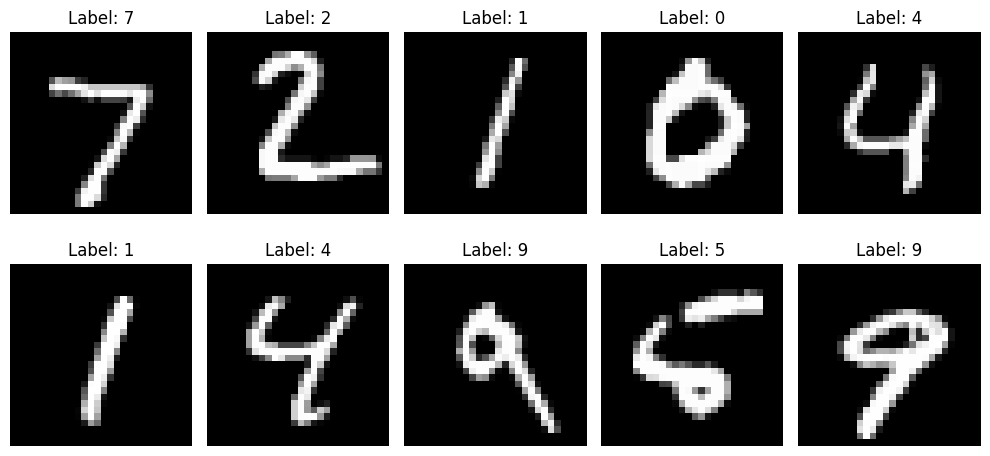

In [ ]:
from tensorflow.keras.datasets import mnist
(x_new_test, y_new_test) = mnist.load_data()[1]  # Load only the test set

# Preprocess the data
x_new_test = x_new_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
y_new_test_categorical = tf.keras.utils.to_categorical(y_new_test, 10)

# Visualize some images from the new test set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_new_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_new_test[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Load the best model
best_model = tf.keras.models.load_model('best.keras')

# Load the last model
last_model = tf.keras.models.load_model('best.keras')

In [ ]:
# Evaluate the best model
best_model_loss, best_model_acc = best_model.evaluate(x_new_test, y_new_test_categorical)
print(f'Best model - Loss: {best_model_loss}, Accuracy: {best_model_acc}')

# Evaluate the last model
last_model_loss, last_model_acc = last_model.evaluate(x_new_test, y_new_test_categorical)
print(f'Last model - Loss: {last_model_loss}, Accuracy: {last_model_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9897 - loss: 0.0414
Best model - Loss: 0.03293668478727341, Accuracy: 0.9916999936103821
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9897 - loss: 0.0414
Last model - Loss: 0.03293668478727341, Accuracy: 0.9916999936103821


In [ ]:
# Make predictions using both models
best_model_predictions = best_model.predict(x_new_test)
last_model_predictions = last_model.predict(x_new_test)

# Convert predictions to label indices
best_model_pred_classes = np.argmax(best_model_predictions, axis=1)
last_model_pred_classes = np.argmax(last_model_predictions, axis=1)

# Confusion matrices for both models
cm_best_model = confusion_matrix(y_new_test, best_model_pred_classes)
cm_last_model = confusion_matrix(y_new_test, last_model_pred_classes)

# Classification reports for both models
report_best_model = classification_report(y_new_test, best_model_pred_classes)
report_last_model = classification_report(y_new_test, last_model_pred_classes)

# Print classification reports
print("Classification Report - Best Model:\n", report_best_model)
print("Classification Report - Last Model:\n", report_last_model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step
Classification Report - Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Classification Report - Last Model:
               precision    recall  f1-score   support

           0       1.00   

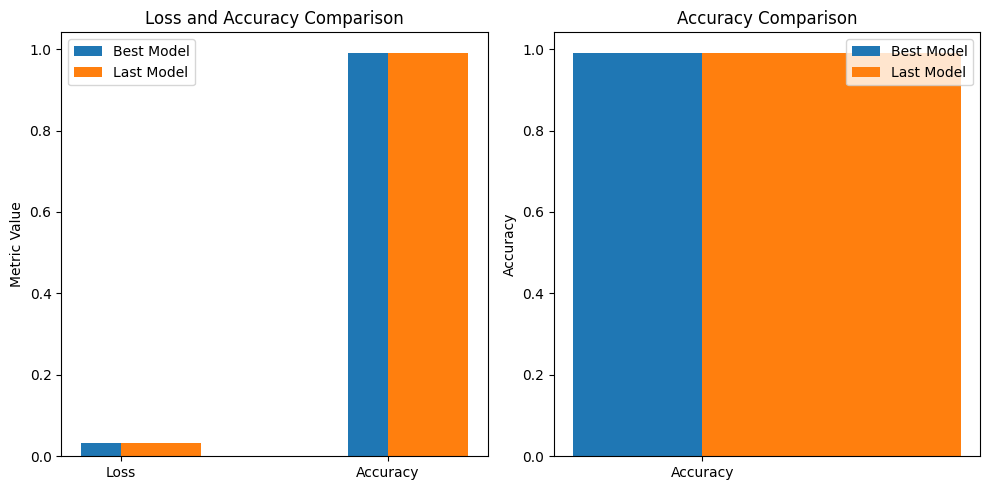

In [ ]:
# Bar plot for accuracy and loss comparison
metrics = ['Loss', 'Accuracy']
best_model_metrics = [best_model_loss, best_model_acc]
last_model_metrics = [last_model_loss, last_model_acc]

plt.figure(figsize=(10, 5))

# Bar plot for Loss
plt.subplot(1, 2, 1)
plt.bar(metrics, best_model_metrics, width=0.3, label='Best Model', align='center')
plt.bar(metrics, last_model_metrics, width=0.3, label='Last Model', align='edge')
plt.title('Loss and Accuracy Comparison')
plt.ylabel('Metric Value')
plt.legend()

# Bar plot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [best_model_acc], width=0.3, label='Best Model', align='center')
plt.bar(['Accuracy'], [last_model_acc], width=0.3, label='Last Model', align='edge')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

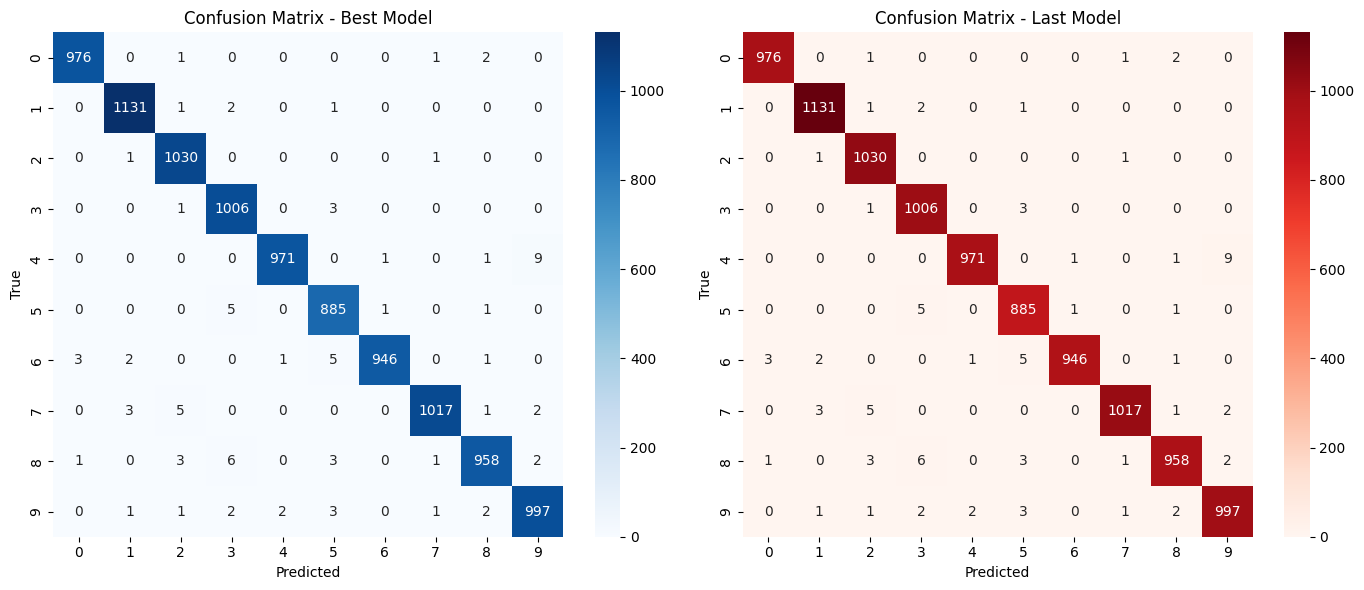

In [ ]:
# Plot confusion matrix comparison
plt.figure(figsize=(14, 6))

# Confusion Matrix - Best Model
plt.subplot(1, 2, 1)
sns.heatmap(cm_best_model, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Best Model')
plt.xlabel('Predicted')
plt.ylabel('True')

# Confusion Matrix - Last Model
plt.subplot(1, 2, 2)
sns.heatmap(cm_last_model, annot=True, fmt='d', cmap='Reds', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - Last Model')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
# Print classification reports
print("Classification Report - Best Model:\n", report_best_model)
print("Classification Report - Last Model:\n", report_last_model)


Classification Report - Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Classification Report - Last Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
    